In [60]:
import pandas as pd
import numpy as np
import itertools

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn')

In [46]:
import pickle
with open('./data/cleaned_df.pickle', 'rb') as file:
    df = pickle.load(file)
    

## Preview the class imbalance

In [47]:
# Count the number of fraudulent/infraudulent purchases
df['default_next_month'].value_counts(normalize=True)

0    0.778594
1    0.221406
Name: default_next_month, dtype: float64

## Define the predictor and target variables

In [48]:
# Your code here
y = df['default_next_month']
X = df.drop(columns=['default_next_month'], axis=1)
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

Find the class imbalance in the training and test sets: 

In [49]:
# Training set
print(y_train.value_counts(normalize=True))
print('\n')
# Test set
print(y_test.value_counts(normalize=True))

0    0.778398
1    0.221602
Name: default_next_month, dtype: float64


0    0.779052
1    0.220948
Name: default_next_month, dtype: float64


## Train a vanilla classifier

In [50]:

# Train the classifier using training data 
dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED, class_weight="balanced")
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=1)

## Make predictions 

In [51]:
# Make predictions using test set 
y_pred = dt.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6098855432028253

## Maximum Tree Depth

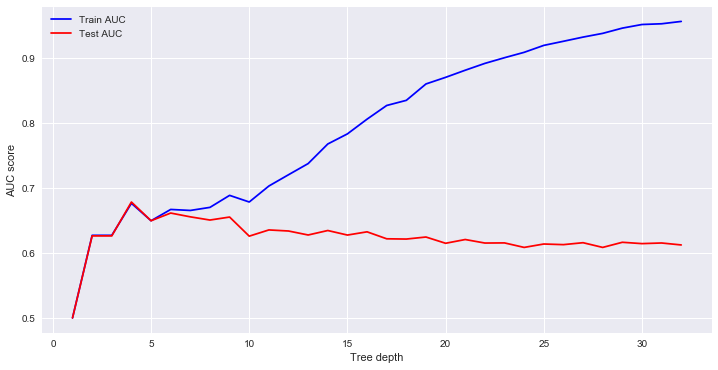

In [52]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

## Minimum Sample Split

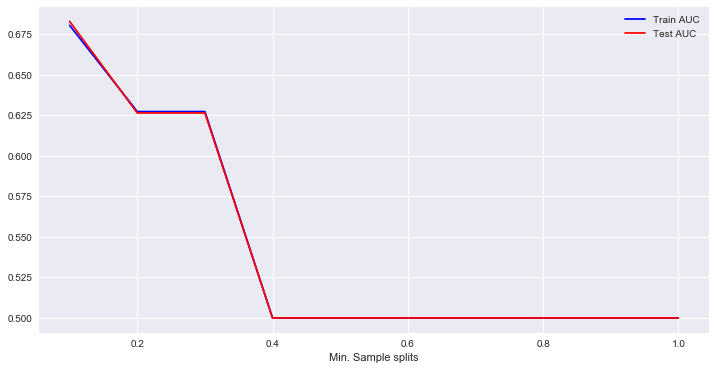

In [53]:
# Identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

## Minimum Sample Leafs

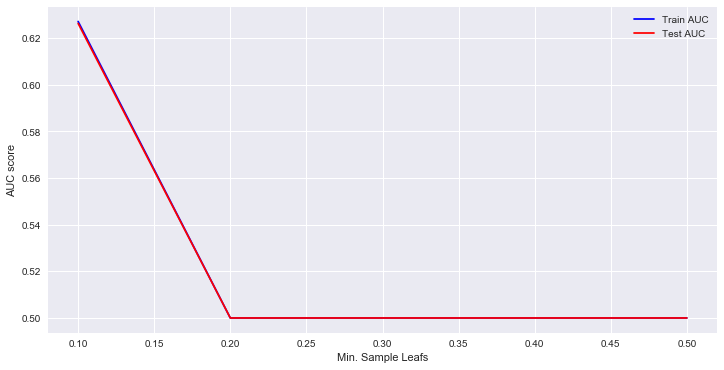

In [54]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

## Maximum Features

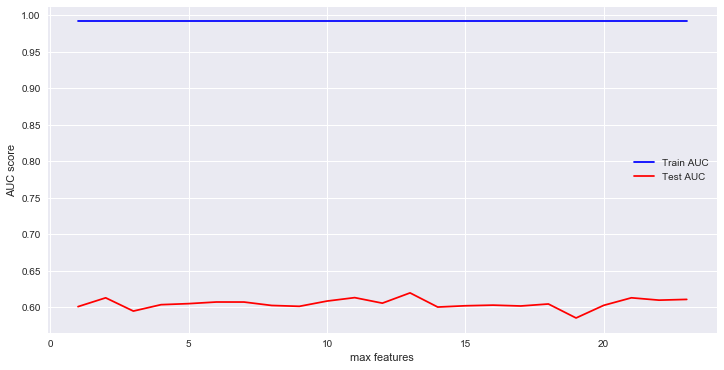

In [55]:
# Find the best value for optimal maximum feature size
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

## Re-train the classifier with chosen values

In [62]:
# Train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=4,
                           max_depth=4,
                           min_samples_split=0.1,
                           min_samples_leaf=0.1, 
                           random_state=SEED)
dt.fit(X_train, y_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6106787835469838

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      6999
           1       0.39      0.40      0.39      1985

    accuracy                           0.73      8984
   macro avg       0.61      0.61      0.61      8984
weighted avg       0.73      0.73      0.73      8984



In [64]:
# Create the samplers
rus = RandomOverSampler(random_state=3)
#rus = RandomUnderSampler(random_state=3)

# Fit SMOTE to training data
#X_train_resampled, y_train_resampled = ADASYN().fit_sample(X_train, y_train) 
X_train_resampled, y_train_resampled = rus.fit_sample(X_train, y_train)

C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [65]:
# Train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=4,
                           max_depth=4,
                           min_samples_split=0.1,
                           min_samples_leaf=0.1, 
                           random_state=SEED)
dt.fit(X_train_resampled, y_train_resampled)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6106787835469838

In [67]:
y_pred = dt.predict(X_test)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81      6999
           1       0.42      0.65      0.51      1985

    accuracy                           0.72      8984
   macro avg       0.65      0.70      0.66      8984
weighted avg       0.78      0.72      0.74      8984

